# Time Series Analysis Project - Tesla Stock Analysis

# Problem Definition
# An investor in a dilemma on the best US EV stock to invest in, to maximize return on investment
## The project aims to:
## 1. etablish Tesla stock price movement by conducting a trend Analysis of TSLA Stock performance and forecasting TSLA stock price using FB prophet
## 2. confirm the return on investment (ROI) of multiple Electric vehicle stocks (namely TSLA, GM and Ford) with a view to select the most profitable stock to invest in by comparing the stocks ROI over a 4-year period.

# Procedure:
1. The necessary libraries were imported
2. The timeframe of the data to be downloaded from Yahoo Finance was defined and the necessary Ticker symbol was inserted for loading
3. The datasets were preprocessed to prepare the data for analysis (index was reset, necessary data were extracted
4. The datasets were imported from Yahoo Finance and aggregated
5. The model was trained to fit the prepocessed data using FB Prophet
6. The model was evaluated to detect anomalies
7. The model was used to predict the price of TSLA stock using Matplotlib and FB prophet.

# Installing the necessary modules

In [1]:
# Installing the necessary moda
#!pip install pystan
#!pip install Cython
!pip install prophet


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import prophet
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
#from .autonotebook import tqdm as notebook_tqdm

import warnings
warnings.simplefilter(action='ignore')

import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
#yf.pdr_override() # <== that's all it takes :-)

# Defining the Time Frame

In [4]:
# Defining the Time Frame
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

# Loading the Training stock data

In [5]:
# Loading the Training stock data
ticker = 'TSLA'
data = yf.download(ticker, start, end)
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2025-05-23,339.339996,343.179993,333.209991,337.920013,84654800
2025-05-27,362.890015,363.790009,347.320007,347.350006,120146400


# Exporting the data dataframe as csv file

In [6]:
# Exporting the data dataframe as csv file
data.to_csv("TESLA stock prices.csv")

In [7]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...
1355,2025-05-23,339.339996,343.179993,333.209991,337.920013,84654800
1356,2025-05-27,362.890015,363.790009,347.320007,347.350006,120146400
1357,2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300


In [8]:
data.columns.tolist()

[('Date', ''),
 ('Close', 'TSLA'),
 ('High', 'TSLA'),
 ('Low', 'TSLA'),
 ('Open', 'TSLA'),
 ('Volume', 'TSLA')]

In [9]:
# Extracting the required data
needed_data = data[['Date','Close']]
needed_data.head(5)

Price,Date,Close
Ticker,,TSLA
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334


In [10]:
# Renaming the columns
needed_data.columns = ["ds", "y"]
needed_data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1355,2025-05-23,339.339996
1356,2025-05-27,362.890015
1357,2025-05-28,356.899994
1358,2025-05-29,358.429993


In [11]:
# Check column types
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1360 non-null   datetime64[ns]
 1   y       1360 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.4 KB


In [12]:
estimated_days=91
df0 = needed_data.copy()
needed_data = needed_data[:-estimated_days]
needed_data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1264,2025-01-13,403.309998
1265,2025-01-14,396.359985
1266,2025-01-15,428.220001
1267,2025-01-16,413.820007


In [13]:
# Prepare Prophet() model and apply fit() method to that dataframe
df_prophet = prophet.Prophet(changepoint_prior_scale=0.15,
                             yearly_seasonality=True,
                             daily_seasonality=True)
df_prophet.fit(needed_data)

01:15:26 - cmdstanpy - INFO - Chain [1] start processing
01:15:27 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# I am using here 2 * estimated_days: half of it has actual prices to compare with trend values. 
# The second half are new estimated future values.
df_forecast = df_prophet.make_future_dataframe(periods= estimated_days*2, freq='D')

#Forecast future prices
df_forecast = df_prophet.predict(df_forecast)
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,17.332255,-2.517668,65.747725,17.332255,17.332255,14.501397,14.501397,14.501397,-39.192852,...,-2.698392,-2.698392,-2.698392,56.392641,56.392641,56.392641,0.0,0.0,0.0,31.833652
1,2020-01-03,18.113387,0.165712,66.903954,18.113387,18.113387,15.168713,15.168713,15.168713,-39.192852,...,-2.367033,-2.367033,-2.367033,56.728599,56.728599,56.728599,0.0,0.0,0.0,33.282101
2,2020-01-06,20.456784,4.001287,70.949089,20.456784,20.456784,17.071037,17.071037,17.071037,-39.192852,...,-1.138755,-1.138755,-1.138755,57.402644,57.402644,57.402644,0.0,0.0,0.0,37.527821
3,2020-01-07,21.237916,3.005201,73.699515,21.237916,21.237916,16.641683,16.641683,16.641683,-39.192852,...,-1.648673,-1.648673,-1.648673,57.483208,57.483208,57.483208,0.0,0.0,0.0,37.879599
4,2020-01-08,22.019049,4.036870,71.245354,22.019049,22.019049,16.340184,16.340184,16.340184,-39.192852,...,-1.945356,-1.945356,-1.945356,57.478392,57.478392,57.478392,0.0,0.0,0.0,38.359233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2025-07-14,461.135875,294.293887,490.751822,368.572780,556.098868,-63.929981,-63.929981,-63.929981,-39.192852,...,-1.138755,-1.138755,-1.138755,-23.598374,-23.598374,-23.598374,0.0,0.0,0.0,397.205894
1447,2025-07-15,461.628493,295.311008,496.428175,368.350931,557.112100,-64.270252,-64.270252,-64.270252,-39.192852,...,-1.648673,-1.648673,-1.648673,-23.428726,-23.428726,-23.428726,0.0,0.0,0.0,397.358241
1448,2025-07-16,462.121111,296.284761,500.827497,368.141461,558.125333,-64.526265,-64.526265,-64.526265,-39.192852,...,-1.945356,-1.945356,-1.945356,-23.388057,-23.388057,-23.388057,0.0,0.0,0.0,397.594846
1449,2025-07-17,462.613730,297.227166,501.154447,367.976617,559.138565,-65.364582,-65.364582,-65.364582,-39.192852,...,-2.698392,-2.698392,-2.698392,-23.473338,-23.473338,-23.473338,0.0,0.0,0.0,397.249148


## Investigating Anomalies in our Forecast

In [15]:
#Investigating predicted data for anomalies
df_forecast.to_csv("investigate.csv")

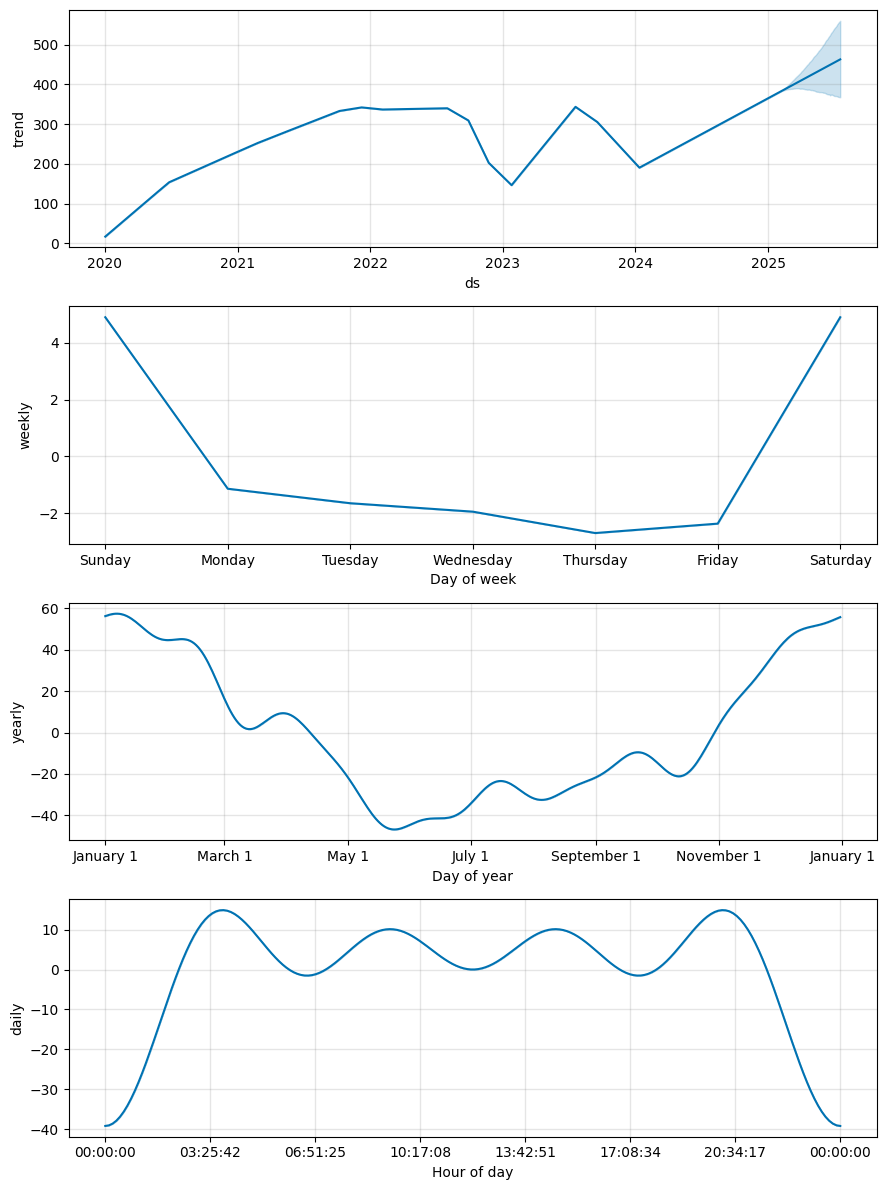

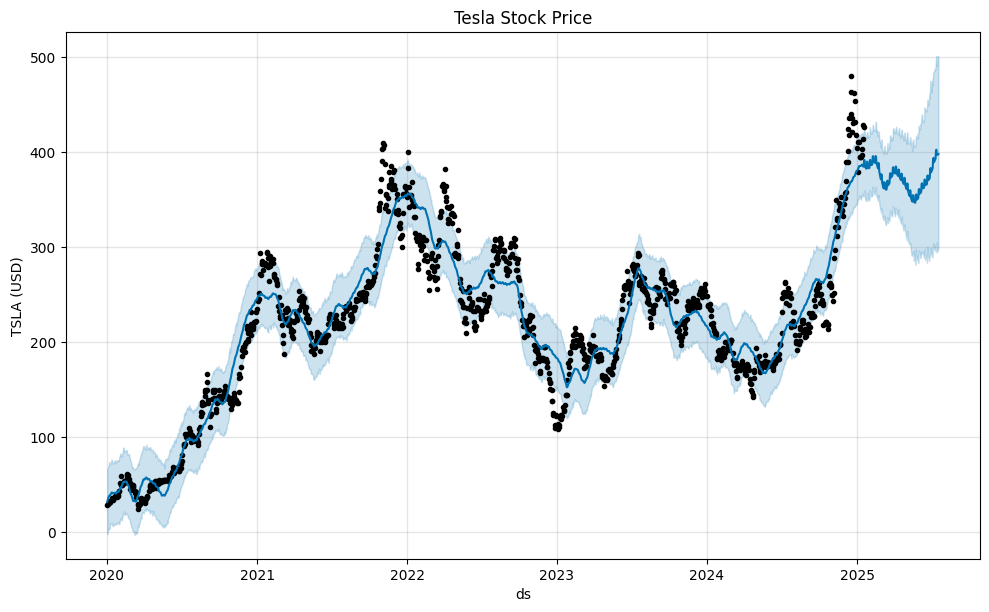

In [16]:
# plot_components() draws 4 graps showing:
#     - trend line
#     - yearly seasonality
#     - weekly seasonality
#     - daily seasonality
df_prophet.plot_components(df_forecast)

# Draw forecast results
df_prophet.plot(df_forecast, xlabel = 'ds', ylabel = 'Tesla Stock Price (USD)')

plt.title('Tesla Stock Price')
plt.ylabel('TSLA (USD)')
plt.show()

From the above analysis, FB prophet was able to accurately predict TSLA stock price movement pattern over the 5-year period until after mid-2024. FB
prophet may be unable to accurately predict the price pattern towards the tale end of 2024 due to surge in TSLA share price as a result of general
increase in US share prices due to increased market confidence in stock market after Donald Trump won US election and also increase in market value 
of TSLA due to rise in price of bitcoin which constitute part of TSLA balance sheet assets after US election. FB prophet also lost his predicting power on TSLA stock price volatility in the 1st Quarter as a result of sentiment towards TSLA stock price due to Elon Musk involvement in US government politics coupled with uncertainty in the world market as a result of announcement of introduction of new tariff regime by US government.

In [17]:
df_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,17.332255,-2.517668,65.747725,17.332255,17.332255,14.501397,14.501397,14.501397,-39.192852,...,-2.698392,-2.698392,-2.698392,56.392641,56.392641,56.392641,0.0,0.0,0.0,31.833652
1,2020-01-03,18.113387,0.165712,66.903954,18.113387,18.113387,15.168713,15.168713,15.168713,-39.192852,...,-2.367033,-2.367033,-2.367033,56.728599,56.728599,56.728599,0.0,0.0,0.0,33.282101
2,2020-01-06,20.456784,4.001287,70.949089,20.456784,20.456784,17.071037,17.071037,17.071037,-39.192852,...,-1.138755,-1.138755,-1.138755,57.402644,57.402644,57.402644,0.0,0.0,0.0,37.527821
3,2020-01-07,21.237916,3.005201,73.699515,21.237916,21.237916,16.641683,16.641683,16.641683,-39.192852,...,-1.648673,-1.648673,-1.648673,57.483208,57.483208,57.483208,0.0,0.0,0.0,37.879599
4,2020-01-08,22.019049,4.036870,71.245354,22.019049,22.019049,16.340184,16.340184,16.340184,-39.192852,...,-1.945356,-1.945356,-1.945356,57.478392,57.478392,57.478392,0.0,0.0,0.0,38.359233


In [18]:
len(data)

1360

In [19]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [20]:
data.iloc[:,0:5]  

Price,Date,Close,High,Low,Open
Ticker,,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999
1,2020-01-03,29.534000,30.266666,29.128000,29.366667
2,2020-01-06,30.102667,30.104000,29.333332,29.364668
3,2020-01-07,31.270666,31.441999,30.224001,30.760000
4,2020-01-08,32.809334,33.232666,31.215334,31.580000
...,...,...,...,...,...
1355,2025-05-23,339.339996,343.179993,333.209991,337.920013
1356,2025-05-27,362.890015,363.790009,347.320007,347.350006
1357,2025-05-28,356.899994,365.000000,355.910004,364.839996


In [21]:
# Extracting data with common dates with original data
pred_forecast = df_forecast.loc[df_forecast['ds'].isin(data['Date'])]
pred_forecast.iloc[:,0:5]                               

,ds,trend,yhat_lower,yhat_upper,trend_lower
0,2020-01-02,17.332255,-2.517668,65.747725,17.332255
1,2020-01-03,18.113387,0.165712,66.903954,18.113387
2,2020-01-06,20.456784,4.001287,70.949089,20.456784
3,2020-01-07,21.237916,3.005201,73.699515,21.237916
4,2020-01-08,22.019049,4.036870,71.245354,22.019049
...,...,...,...,...,...
1394,2025-05-23,435.519729,281.356710,406.206674,380.724075
1398,2025-05-27,437.490202,286.082039,414.570770,380.623483
1399,2025-05-28,437.982820,289.719764,419.469153,380.346005
1400,2025-05-29,438.475438,286.264707,414.548639,380.388927


# Analysis of Variance in our Prediction using Matplotlib

In [22]:
# Installing the cufflinks modules
# !pip install cufflinks

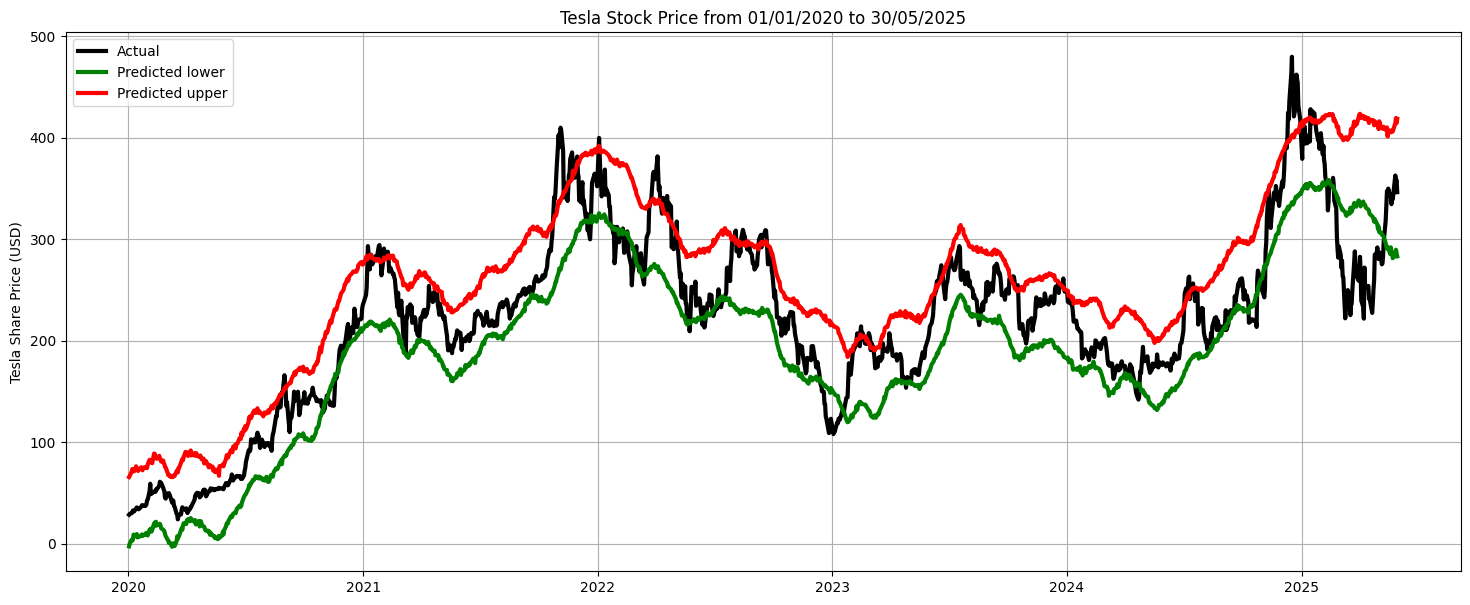

In [23]:
import matplotlib
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 7)

plt.plot(data['Date'], data['Close'], linestyle='-', label="Actual",linewidth=3, color='black')
plt.plot(pred_forecast['ds'], pred_forecast['yhat_lower'],linestyle='-', label="Predicted lower",linewidth=3, color='green')
plt.plot(pred_forecast['ds'], pred_forecast['yhat_upper'],linestyle='-', label="Predicted upper",linewidth=3, color='red')
plt.grid(True)
plt.legend()
plt.title('Tesla Stock Price from 01/01/2020 to 30/05/2025')
plt.ylabel('Tesla Share Price (USD)')
plt.show()

# Comments

From the above analysis,the chart shows that the Predicted Lower was able to fairly predict the movement in price pattern between year 2020 and 2022, 
except for some point in 2022 where there is a significcant deviation from the actual. However, the prediction accuracy dropped between 2022 and 2024.

On the other hand, Predicted Upper predicted the stock price movement almost accurately between 2020 and 2024 but there was a signicant deviation in
predicted price movement pattern towards the end of 2024 which may be likely due to overall rise in stock prices in USA after Donald Trump won the 
US election resulting in increased confidence in US market.

# Analysis of AAPL Stock Price Prediction between 2020 & 2024 using FB Prophet

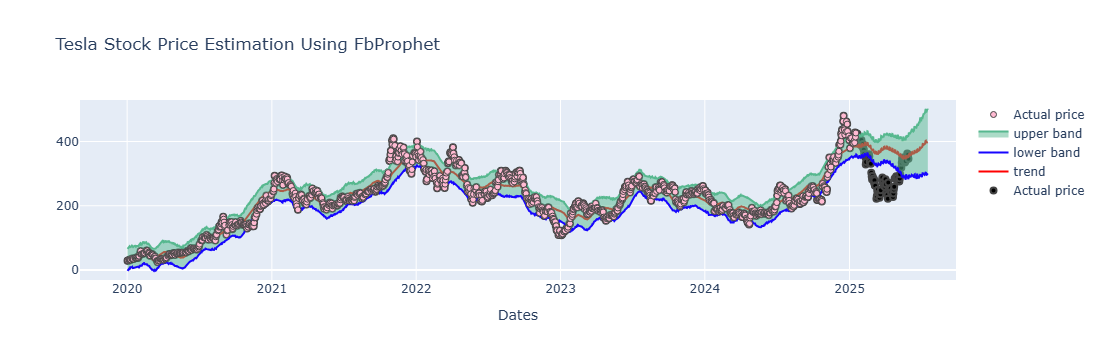

<Figure size 640x480 with 0 Axes>

In [24]:
# To be modify
fig = go.Figure()
trace = go.Scatter(name = 'Actual price', mode = 'markers', x = list(df_forecast['ds']), y = list(needed_data['y']),
                   marker=dict(color='#FFBAD2',line=dict(width=1)))
trace1 = go.Scatter(name = 'trend', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat']), 
                   marker=dict(color='red', line=dict(width=3)))
upper_band = go.Scatter(name = 'upper band', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat_upper']),
                        line= dict(color='#57b88f'), fill = 'tonexty')
lower_band = go.Scatter(name= 'lower band', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat_lower']),
                        line= dict(color='#1705ff'))
tracex = go.Scatter(name = 'Actual price', mode = 'markers', x = list(df0['ds']), y = list(df0['y']), 
                    marker=dict(color='black',line=dict(width=2)))

data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Tesla Stock Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

plt.savefig('Tesla Stock Price.png')

py.offline.iplot(figure)
#plt.show()

# Comments

Using FB Prophet, the Upper and Lower Band was able to give a near perfect prediction of the price movement between 2020 and 2024 until towards
the end of 2024 when there was significant deviation of the predcition form actual price movement. On few occassions the deviation between the actual
price and Lower band prediction was noticeable, such as the beginning of 2021, end of 2021 and beginning of 2022. The FB prophet seems to display a
better result based on the chart above compared to Matplotlib chart. As earlier explained, the deviation toward the end of 2024 was due to increased
market confidence after announcement of US election result. While the deviation in the beginning of year 2025 was due to negative sentiment towards TSLA share price as a result of involvement of Elon Musk in US politics and the announcement of new tariff regime by US government at the beginning of 2nd Quarter of 2025.

# Comparing Price Movement of Tesla Major Competitors

In [25]:
# Defining a Time Frame
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

# Defining ticker_list for Tesla, General Motors and Ford
ticker_list = ['TSLA','GM','F']

# Creating a placeholder
peer_review = pd.DataFrame(columns=ticker_list)

# Extracting the data
for ticker in ticker_list:
    peer_review[ticker] = yf.download(ticker, start, end)['Close']

# print last 5 rows of the data
peer_review.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,GM,F
Date,,,
2025-05-23,339.339996,48.689999,10.36
2025-05-27,362.890015,49.090000,10.31
2025-05-28,356.899994,48.130001,10.17
2025-05-29,358.429993,48.590000,10.22
2025-05-30,346.459991,49.610001,10.38


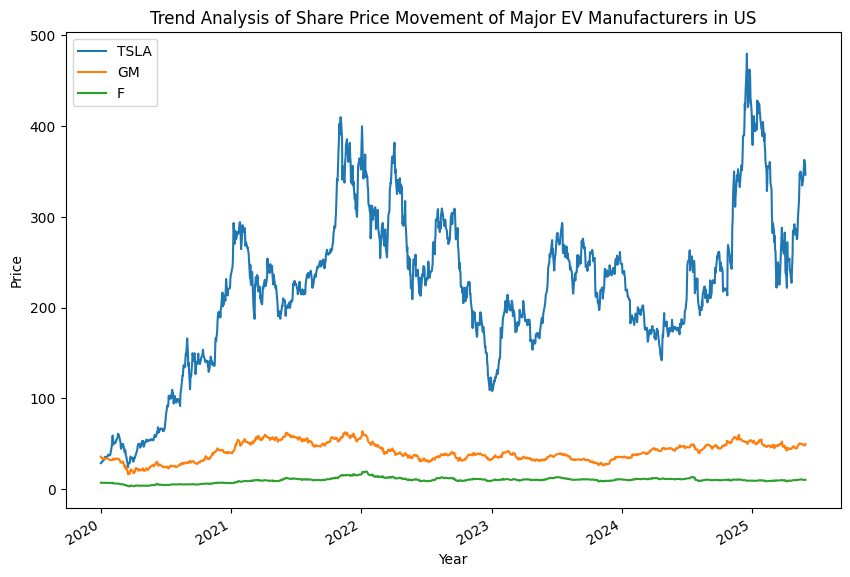

In [26]:
# Trend Analysis of TSLA and its major competitors price movement

peer_review.plot(figsize=(10, 7))

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Trend Analysis of Share Price Movement of Major EV Manufacturers in US')

# Show the plot
plt.show()

In [27]:
# Defining a Time Frame
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

# Defining ticker_list for Tesla, General Motors and Ford
stock_list = ['TSLA','GM','F']

# Creating a placeholder
peer_tradingvol = pd.DataFrame(columns=stock_list)

# Extracting the data
for stock in stock_list:
    peer_tradingvol[stock] = yf.download(stock, start, end)['Volume']

# print last 5 rows of the data
peer_tradingvol.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,GM,F
Date,,,
2025-05-23,84654800,5611900,80519000
2025-05-27,120146400,8936800,89066800
2025-05-28,91404300,8419600,102335600
2025-05-29,88545700,8400400,101642200
2025-05-30,123097900,17702900,152078100


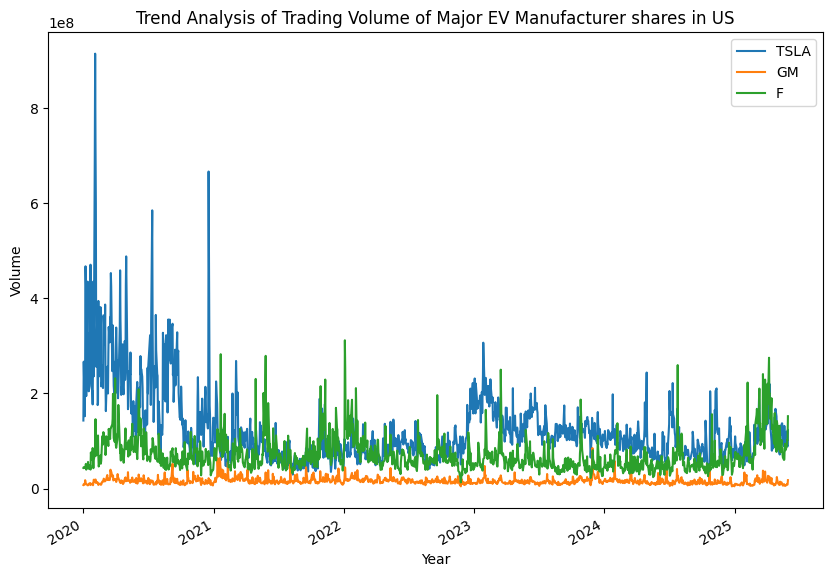

In [28]:
# Trend Analysis of TSLA and its major competitors price movement

peer_tradingvol.plot(figsize=(10, 7))

plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Trend Analysis of Trading Volume of Major EV Manufacturer shares in US')

# Show the plot
plt.show()

In [29]:
# Define the ticker symbol
ticker = yf.Ticker('GM')

# Get historical market data
hist = ticker.history(period="5y")

# Get dividends
dividends = ticker.dividends

# Get stock splits
splits = ticker.splits

In [30]:
dividends.tail()

Date
2024-02-29 00:00:00-05:00    0.12
2024-06-07 00:00:00-04:00    0.12
2024-09-06 00:00:00-04:00    0.12
2024-12-06 00:00:00-05:00    0.12
2025-03-07 00:00:00-05:00    0.12
Name: Dividends, dtype: float64

In [31]:
# Define the ticker symbol
ticker1 = yf.Ticker('TSLA')
ticker2 = yf.Ticker('GM')
ticker3 = yf.Ticker('F')


# Get historical market data
hist1 = ticker1.history(period="5y")
hist2 = ticker2.history(period="5y")
hist3 = ticker3.history(period="5y")

# Get dividends
dividends1 = ticker1.dividends
dividends2 = ticker2.dividends
dividends3 = ticker3.dividends

# Get stock splits
splits1 = ticker1.splits
splits2 = ticker2.splits
splits3 = ticker3.splits

In [32]:
dividends1

Series([], Name: Dividends, dtype: float64)

In [33]:
dividends2

Date
2014-03-14 00:00:00-04:00    0.30
2014-06-06 00:00:00-04:00    0.30
2014-09-08 00:00:00-04:00    0.30
2014-12-08 00:00:00-05:00    0.30
2015-03-09 00:00:00-04:00    0.30
2015-06-08 00:00:00-04:00    0.36
2015-09-10 00:00:00-04:00    0.36
2015-12-16 00:00:00-05:00    0.36
2016-03-09 00:00:00-05:00    0.38
2016-06-08 00:00:00-04:00    0.38
2016-09-07 00:00:00-04:00    0.38
2016-12-05 00:00:00-05:00    0.38
2017-03-08 00:00:00-05:00    0.38
2017-06-07 00:00:00-04:00    0.38
2017-09-07 00:00:00-04:00    0.38
2017-12-07 00:00:00-05:00    0.38
2018-03-08 00:00:00-05:00    0.38
2018-06-07 00:00:00-04:00    0.38
2018-09-06 00:00:00-04:00    0.38
2018-12-06 00:00:00-05:00    0.38
2019-03-07 00:00:00-05:00    0.38
2019-06-06 00:00:00-04:00    0.38
2019-09-05 00:00:00-04:00    0.38
2019-12-05 00:00:00-05:00    0.38
2020-03-05 00:00:00-05:00    0.38
2022-08-30 00:00:00-04:00    0.09
2022-12-01 00:00:00-05:00    0.09
2023-03-02 00:00:00-05:00    0.09
2023-06-01 00:00:00-04:00    0.09
2023-08-3

In [34]:
dividends3

Date
1972-07-25 00:00:00-04:00    0.021897
1972-10-25 00:00:00-04:00    0.021897
1973-01-23 00:00:00-05:00    0.022708
1973-04-24 00:00:00-05:00    0.022708
1973-07-24 00:00:00-04:00    0.032440
                               ...   
2024-05-07 00:00:00-04:00    0.150000
2024-08-07 00:00:00-04:00    0.150000
2024-11-07 00:00:00-05:00    0.150000
2025-02-18 00:00:00-05:00    0.300000
2025-05-12 00:00:00-04:00    0.150000
Name: Dividends, Length: 180, dtype: float64

In [35]:
# Defining a Time Frame
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

# Defining ticker_list for Tesla, General Motors and Ford
ticker_list = ['TSLA','GM','F']

# Creating a placeholder
peer_review = pd.DataFrame(columns=ticker_list)

# Extracting the data
for ticker in ticker_list:
    peer_review[ticker] = yf.download(ticker, start, end)['Close']

# print last 5 rows of the data
peer_review.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,GM,F
Date,,,
2025-05-23,339.339996,48.689999,10.36
2025-05-27,362.890015,49.090000,10.31
2025-05-28,356.899994,48.130001,10.17
2025-05-29,358.429993,48.590000,10.22
2025-05-30,346.459991,49.610001,10.38


In [36]:
import yfinance as yf
import pandas as pd
import datetime as dt

def calculate_roi(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        return None
    initial_price = float(stock_data['Close'].iloc[0])
    final_price = float(stock_data['Close'].iloc[-1])
    roi = (final_price - initial_price) / initial_price * 100
    return roi

# Define the stock tickers and the period
ticker1 = 'TSLA' 
ticker2 = 'GM'  
ticker3 = 'F'
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime.now()

# Calculate ROI for both stocks
roi1 = calculate_roi(ticker1, start_date, end_date)
roi2 = calculate_roi(ticker2, start_date, end_date)
roi3 = calculate_roi(ticker3, start_date, end_date)

for ticker, roi in zip([ticker1, ticker2, ticker3], [roi1, roi2, roi3]):
    if roi is not None:
        print(f"ROI for {ticker} from {start_date.date()} to {end_date.date()}: {roi:.2f}%")
    else:
        print(f"Failed to fetch data for {ticker}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ROI for TSLA from 2020-01-01 to 2025-06-01: 1107.85%
ROI for GM from 2020-01-01 to 2025-06-01: 38.16%
ROI for F from 2020-01-01 to 2025-06-01: 44.07%


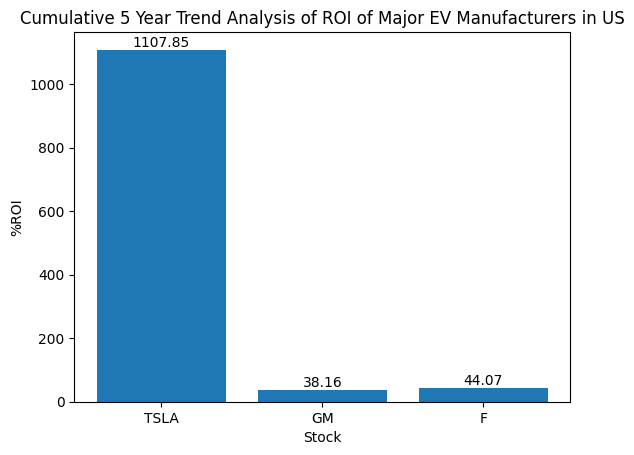

In [37]:
# Trend Analysis of TSLA and its major competitors price movement

# Creating a placeholder
stock = ['TSLA', 'GM', 'F']
roi = [1107.85, 38.16, 44.07]


fig, ax = plt.subplots()
g = ax.bar(stock, roi)
ax.set_xlabel('Stock')
ax.set_ylabel('%ROI')
ax.bar_label(g, label_type='edge')

plt.title('Cumulative 5 Year Trend Analysis of ROI of Major EV Manufacturers in US')

# Show the plot
plt.show()

The above chart revealed that Tesla made over 1107% return for an investor that invested in the stock in 2000, compared to an investor who decided to 
invest in Tesla major competitors General Motors and Ford which will earn the investor 38.16% and 44.07% return on investment respectively. 
This implies risk tolerant investors who are likely to take a calculated risk on identifed value stocks that are unicorn will likely increase their wealth over a short term horizon than risk averse investors who seeks stability. 